# 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

앞서 피처 엔지니어링된 파일을 가지고 Decision Tree외의 다른 모델들을 평가해본다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
original_data = pd.read_csv('/Users/project/aiffel/pokemon/Pokemon.csv')
original_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon = pd.read_csv('/Users/project/aiffel/pokemon/pokemon_feature_engineering.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Flying,Dark,Ghost,Fire,Ice,Steel,Poison,Water,Bug,Electric
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,True,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,True,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,True,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,False,False,False,False,True,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,True,False,False,False,False,False,False


## 훈련 데이터, 학습 데이터 분리

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

- 제거할 컬럼
  - **# :** ID에 해당하는 데이터로, index의 의미 외에 특별한 의미가 담긴 특징이 아니기 때문에 제외
  - **Name :** 문자열 데이터로, 전처리를 통해 "name_count"와 "long_name", 그리고 15개의 토큰 컬럼으로 대체
  - **name_nospace, name_isalpha** : 전처리를 위해 필요했던 컬럼으로 분류 분석에는 필요하지 않음
  - **Type 1 & Type 2** : 속성은 원-핫 인코딩으로 처리했기 때문에 더 이상 필요가 없음
  - **Legendary** : 이 컬럼은 target 데이터이므로 모델이 학습하는 "X" 데이터에는 넣지 않고, "y" 데이터로 사용

- features

In [5]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [6]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


- target

In [7]:
target = "Legendary"
target

'Legendary'

In [8]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

- 훈련 데이터와 학습 데이터로 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


## Decision Tree
의사 결정 규칙과 데이터의 특징을 이용하여 데이터를 여러 개의 소집단으로 분할하는 방식으로 작동  
각각의 소집단은 하나의 클래스에 대응된다.

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### confusion matrix

In [11]:
confusion_matrix(y_test, y_pred)

array([[142,   5],
       [  1,  12]])

- 실제 Positive인 케이스(참 양성, True Positive): 141건
- 실제 Negative인 케이스(참 음성, True Negative): 12건
- False Negative: 1건
- False Positive: 6건

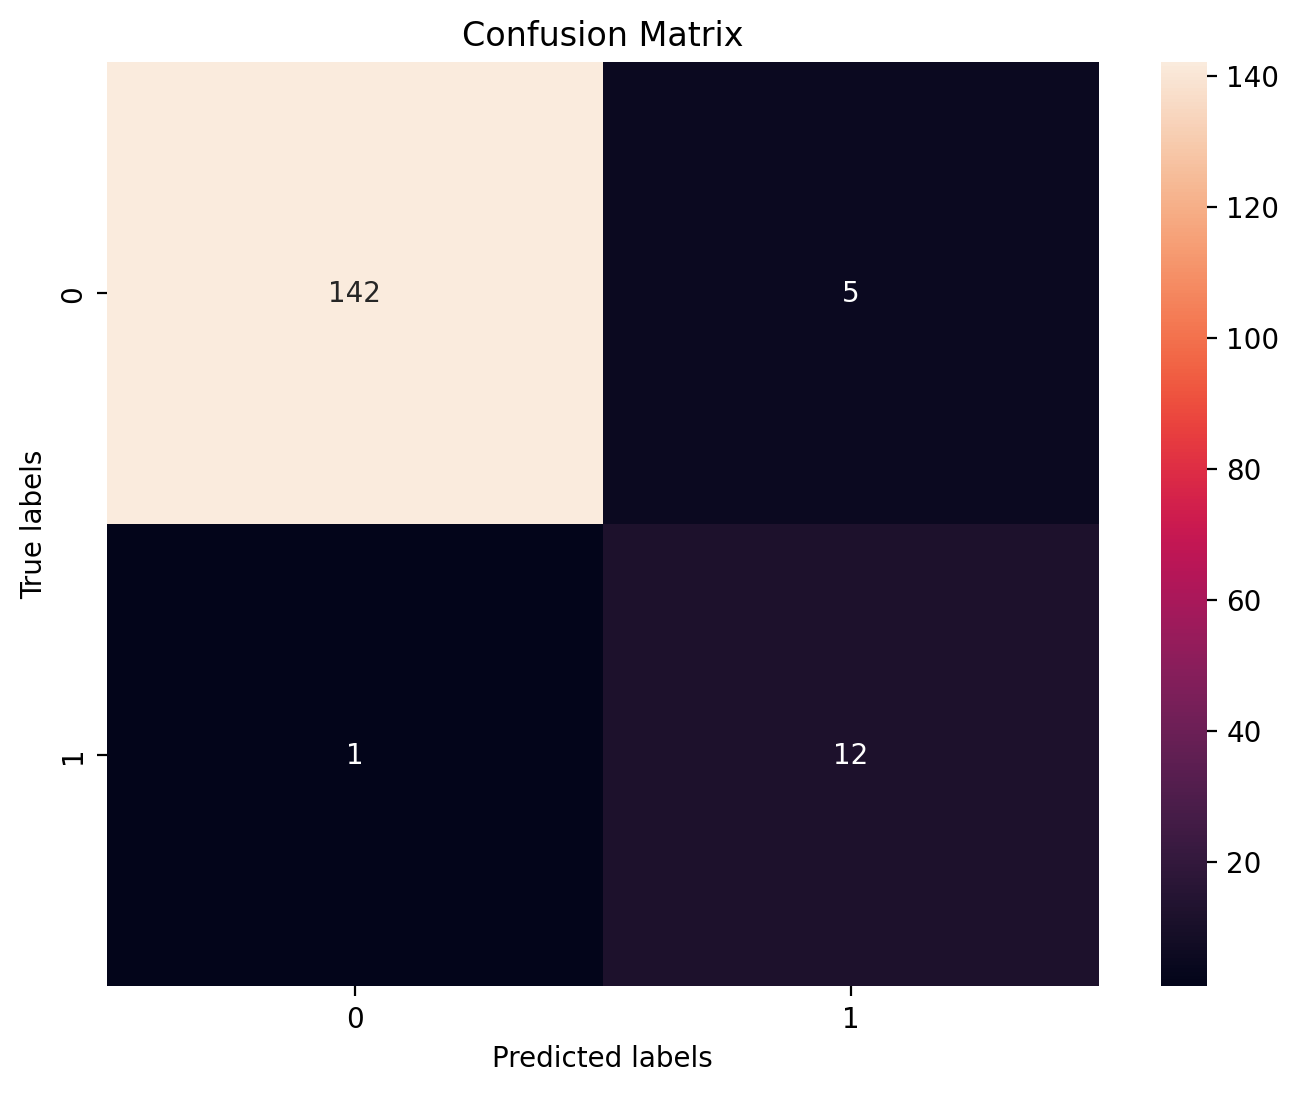

In [12]:
cm = confusion_matrix(y_test, y_pred)

# 숫자 출력 형식을 변경하는 Matplotlib 설정
plt.rcParams['axes.formatter.useoffset'] = False

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### classification report

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.71      0.92      0.80        13

    accuracy                           0.96       160
   macro avg       0.85      0.94      0.89       160
weighted avg       0.97      0.96      0.96       160



- False 클래스에 대한 평가 지표
  - Precision(정밀도): 0.99 (거짓으로 예측한 것 중에서 실제로 거짓인 비율)
  - Recall(재현율): 0.96 (실제로 거짓인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.98 (정밀도와 재현율의 조화 평균)
  - Support(지원): 147 (거짓 클래스에 속한 샘플의 개수)

- True 클래스에 대한 평가 지표:
  - Precision(정밀도): 0.67 (참으로 예측한 것 중에서 실제로 참인 비율)
  - Recall(재현율): 0.92 (실제로 참인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.77 (정밀도와 재현율의 조화 평균)
  - Support(지원): 13 (참 클래스에 속한 샘플의 개수)

- 전체 데이터에 대한 평가 지표:
  - Accuracy(정확도): 0.96 (전체 샘플 중 올바르게 분류된 샘플의 비율)
  - Weighted avg: 0.97 (가중 평균을 사용한 평균)
  - Macro avg: 0.83 (단순 평균을 사용한 평균)

### visualization
결정 트리를 시각화

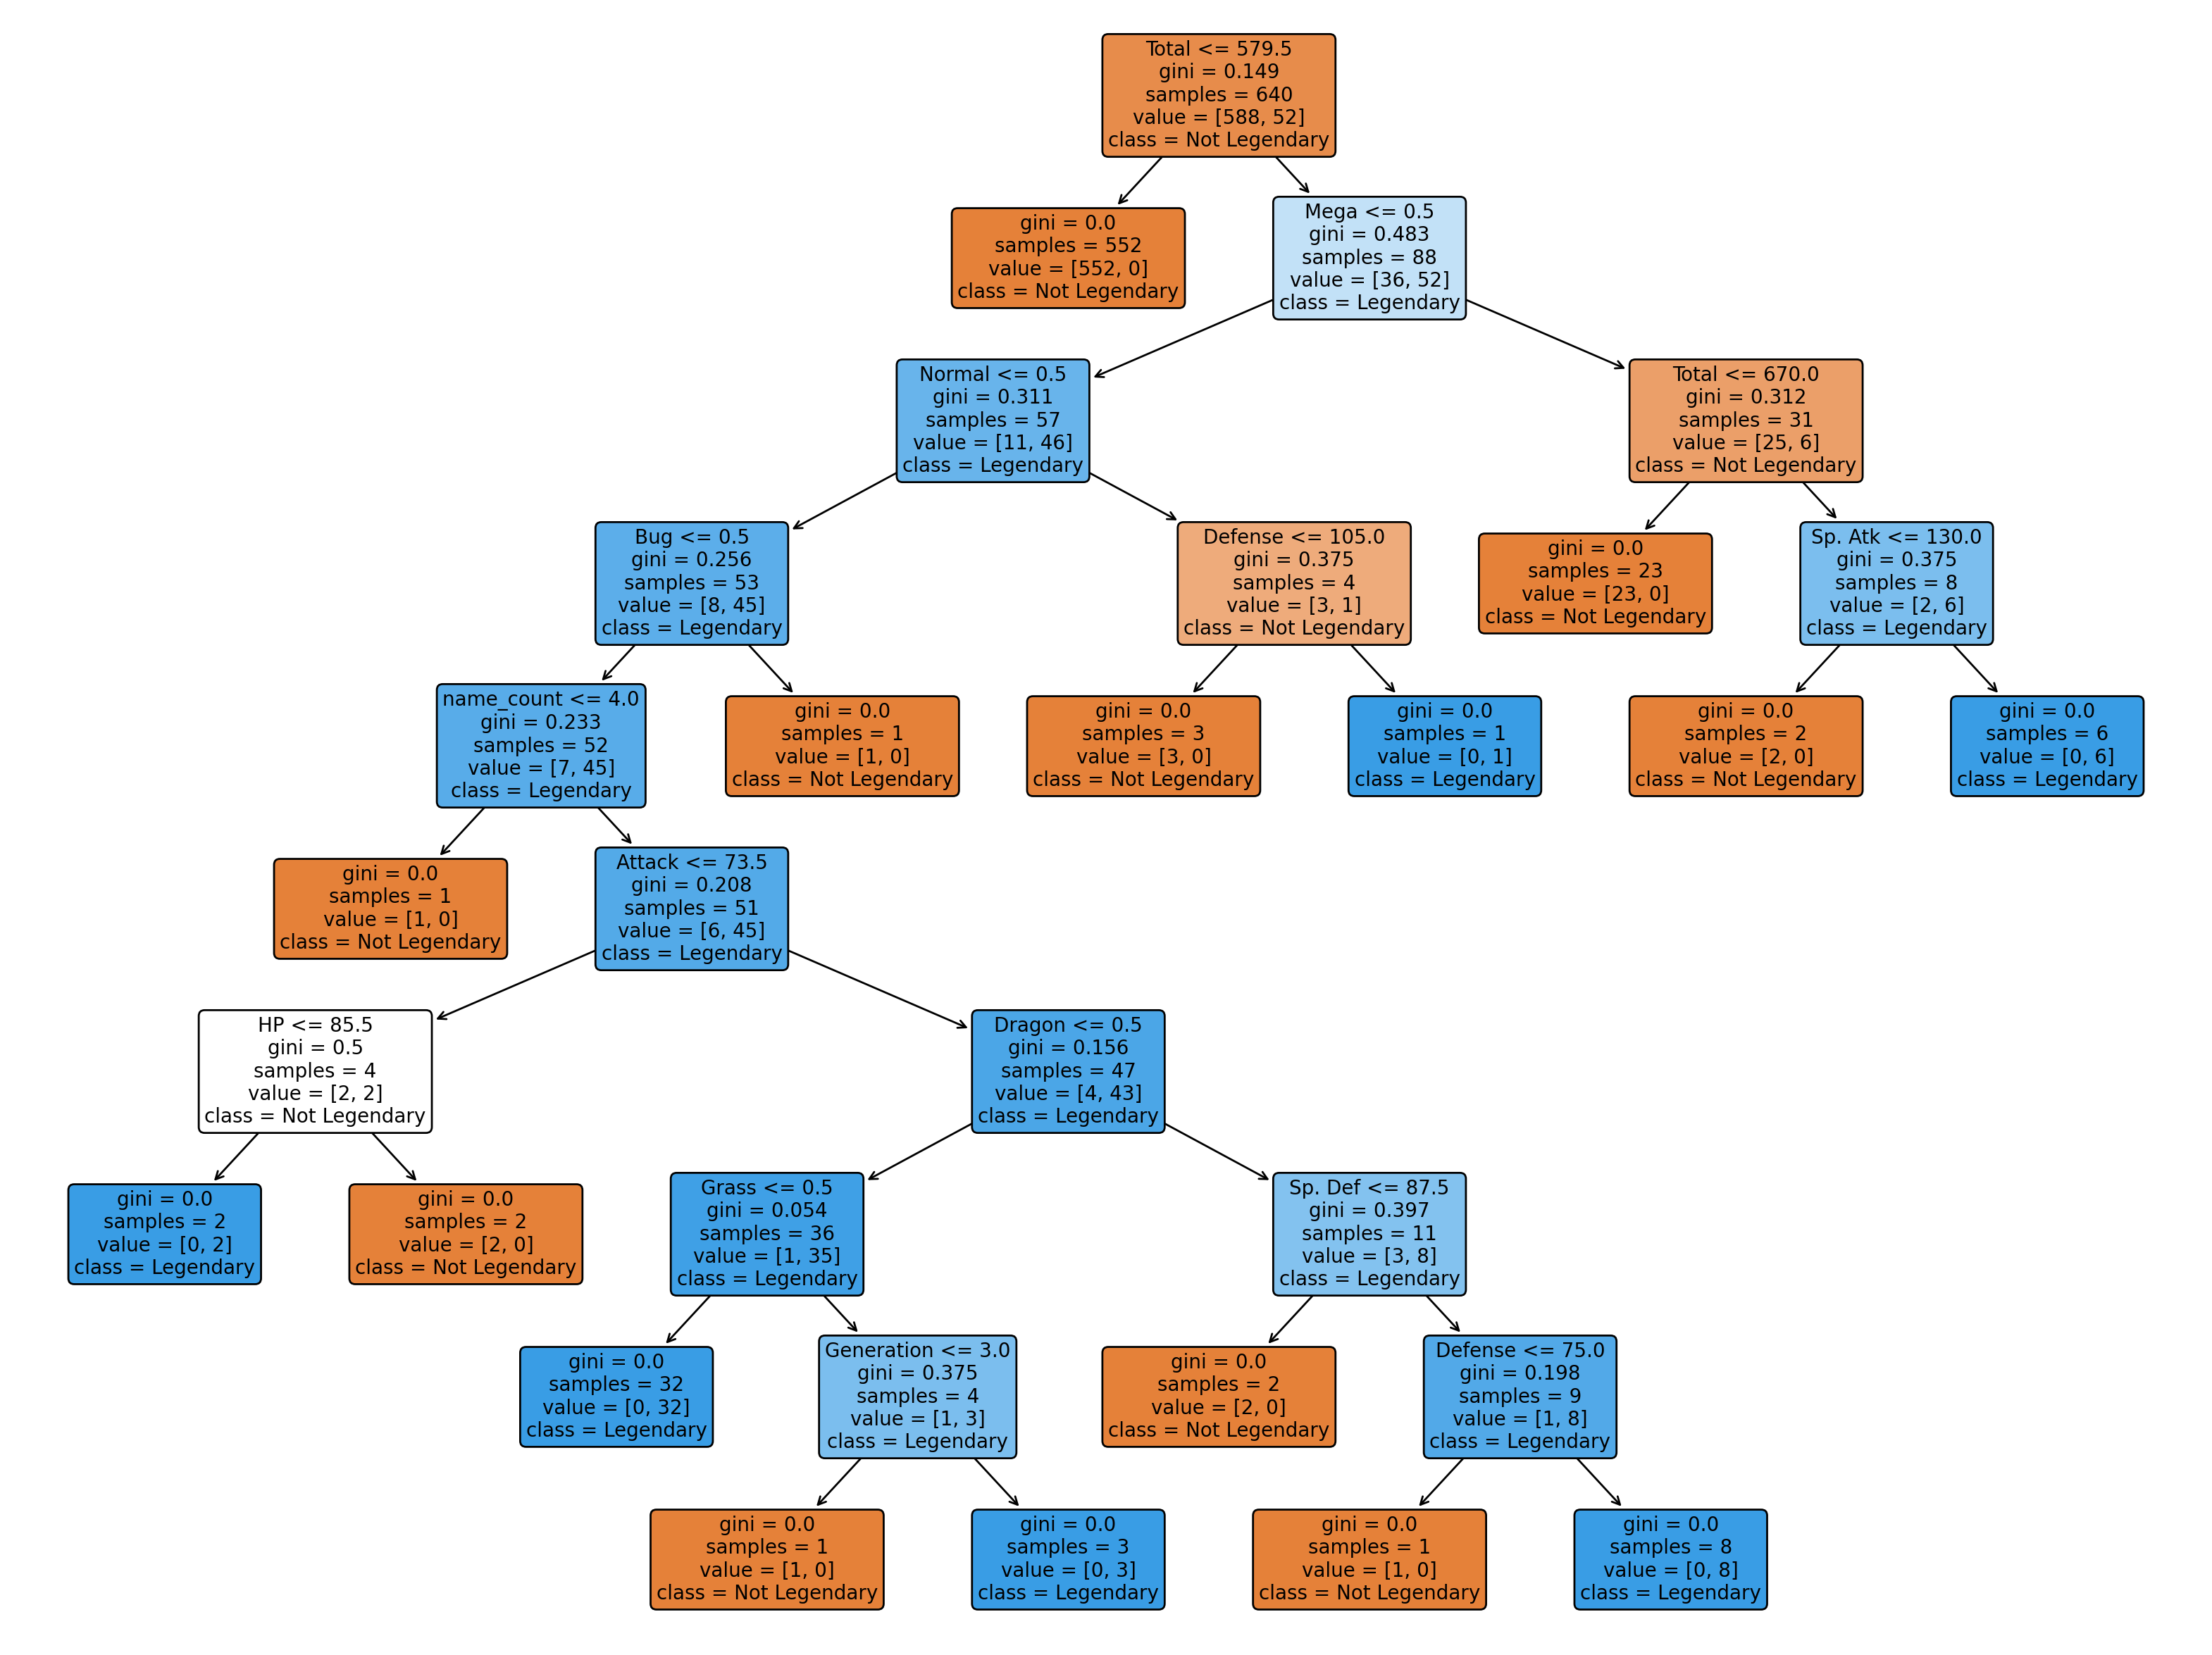

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=features, class_names=["Not Legendary", "Legendary"], filled=True, rounded=True, fontsize=10)
plt.show()


## RandomForest
결정 트리의 앙상블 모델로, 여러 개의 결정 트리를 생성하고 그들의 예측을 종합하여 분류를 수행  
이는 과적합을 줄이고 높은 정확도를 제공하는 데 도움이 된다.

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### confusion matrix

In [16]:
confusion_matrix(y_test, y_pred)

array([[143,   4],
       [  2,  11]])

- 실제 Positive인 케이스(참 양성, True Positive): 144건
- 실제 Negative인 케이스(참 음성, True Negative): 12건
- False Negative: 1건
- False Positive: 3건

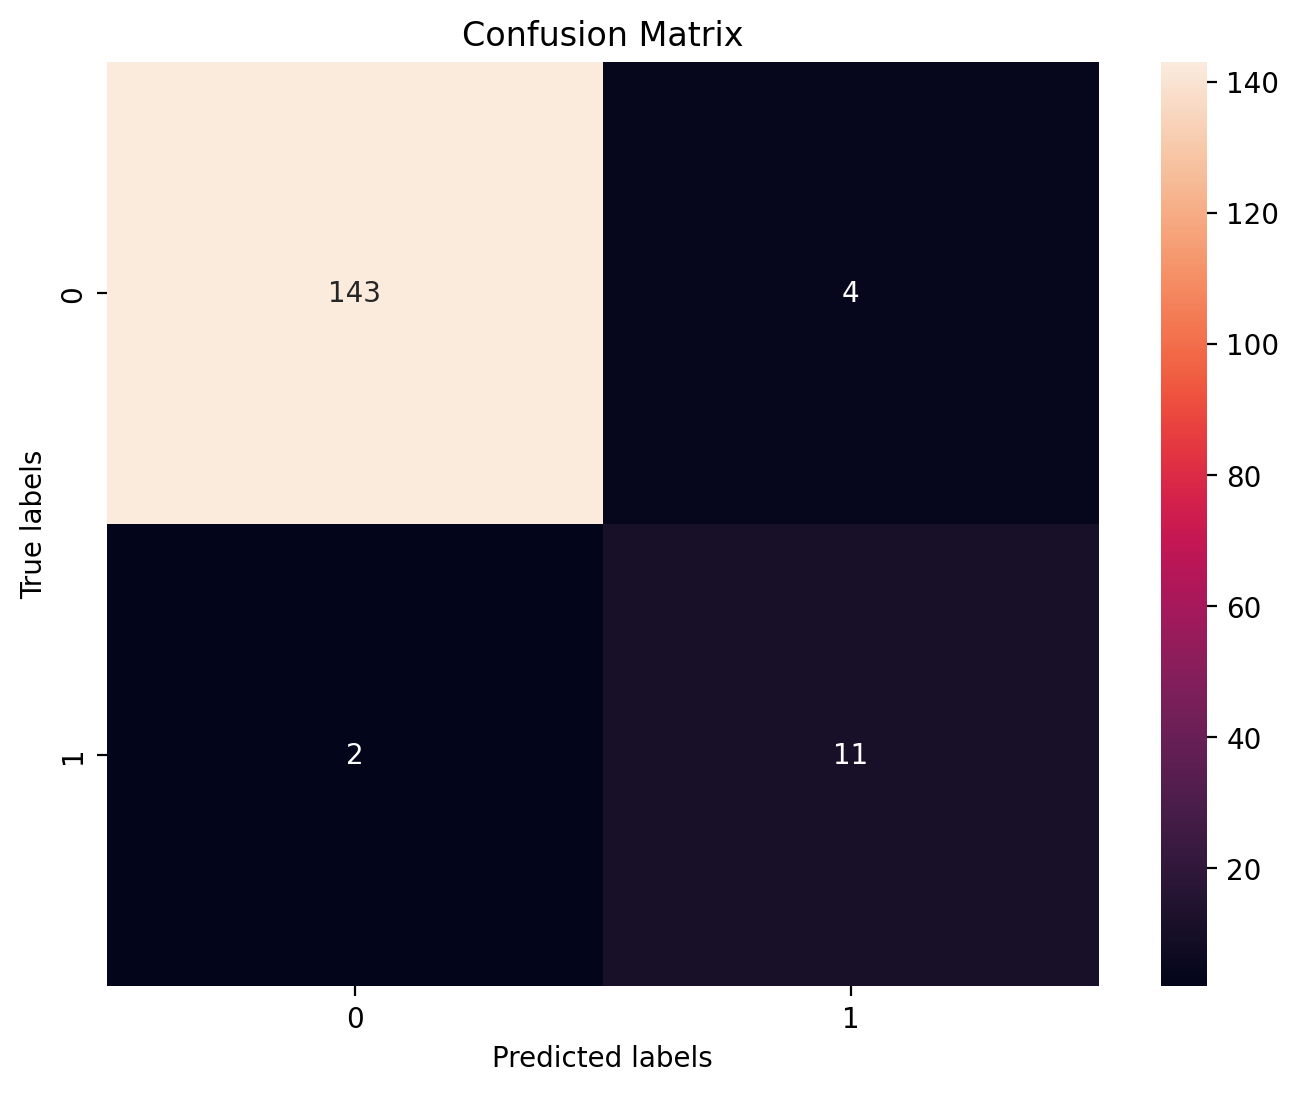

In [17]:
cm = confusion_matrix(y_test, y_pred)

# 숫자 출력 형식을 변경하는 Matplotlib 설정
plt.rcParams['axes.formatter.useoffset'] = False

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### classification report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       147
        True       0.73      0.85      0.79        13

    accuracy                           0.96       160
   macro avg       0.86      0.91      0.88       160
weighted avg       0.97      0.96      0.96       160



- False 클래스에 대한 평가 지표:
  - Precision(정밀도): 0.99 (거짓으로 예측한 것 중에서 실제로 거짓인 비율)
  - Recall(재현율): 0.98 (실제로 거짓인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.99 (정밀도와 재현율의 조화 평균)
  - Support(지원): 147 (거짓 클래스에 속한 샘플의 개수)

- True 클래스에 대한 평가 지표:
  - Precision(정밀도): 0.80 (참으로 예측한 것 중에서 실제로 참인 비율)
  - Recall(재현율): 0.92 (실제로 참인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.86 (정밀도와 재현율의 조화 평균)
  - Support(지원): 13 (참 클래스에 속한 샘플의 개수)

- 전체 데이터에 대한 평가 지표:
  - Accuracy(정확도): 0.97 (전체 샘플 중 올바르게 분류된 샘플의 비율)
  - Weighted avg: 0.98 (가중 평균을 사용한 평균)
  - Macro avg: 0.90 (단순 평균을 사용한 평균)

### visualization
Random Forest는 여러 개의 결정 트리를 앙상블하여 예측을 수행하므로, 각 결정 트리를 시각화해서 보여준다.

✖︎주의✖︎ 그래프 많아서 주석 처리 했습니다. 

In [19]:
# from sklearn.tree import plot_tree

# # Random Forest 모델에서 각 결정 트리를 가져옴
# for i, estimator in enumerate(model.estimators_):
#     plt.figure(figsize=(20, 15))
#     plot_tree(estimator, feature_names=features, class_names=["Not Legendary", "Legendary"], filled=True, rounded=True, fontsize=10)
#     plt.title(f"Decision Tree {i+1}")
#     plt.show()

![랜덤 포레스트 시각화](/Users/project/aiffel/pokemon/output.png)

## Logistic Regression
선형 회귀와 달리 종속 변수가 이항 혹은 다항일 때 사용  
주로 이진 분류에 사용되며, 시그모이드 함수를 사용하여 확률을 예측한다.

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### confusion matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[147,   0],
       [  7,   6]])

- 실제 Positive인 케이스(참 양성, True Positive): 147건
- 실제 Negative인 케이스(참 음성, True Negative): 6건
- False Negative: 7건
- False Positive: 0건

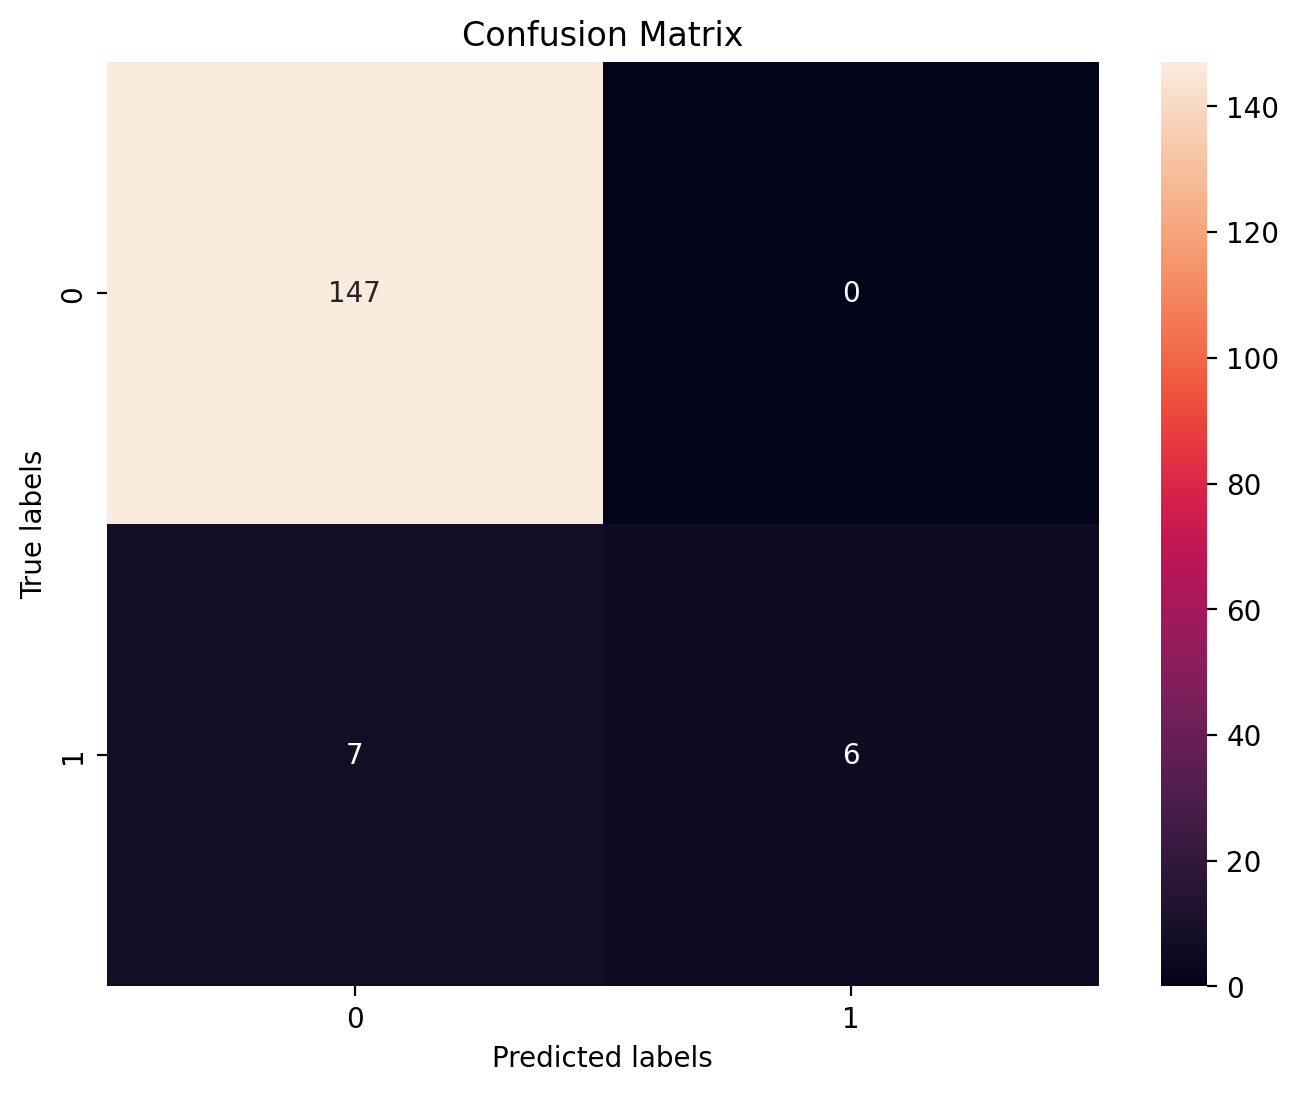

In [22]:
cm = confusion_matrix(y_test, y_pred)

# 숫자 출력 형식을 변경하는 Matplotlib 설정
plt.rcParams['axes.formatter.useoffset'] = False

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### classification report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      1.00      0.98       147
        True       1.00      0.46      0.63        13

    accuracy                           0.96       160
   macro avg       0.98      0.73      0.80       160
weighted avg       0.96      0.96      0.95       160



- False 클래스에 대한 평가 지표:
  - Precision(정밀도): 0.95 (거짓으로 예측한 것 중에서 실제로 거짓인 비율)
  - Recall(재현율): 1.00 (실제로 거짓인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.98 (정밀도와 재현율의 조화 평균)
  - Support(지원): 147 (거짓 클래스에 속한 샘플의 개수)

- True 클래스에 대한 평가 지표:
  - Precision(정밀도): 1.00 (참으로 예측한 것 중에서 실제로 참인 비율)
  - Recall(재현율): 0.46 (실제로 참인 것 중에서 모델이 올바르게 감지한 비율)
  - F1-score(F1 점수): 0.63 (정밀도와 재현율의 조화 평균)
  - Support(지원): 13 (참 클래스에 속한 샘플의 개수)

- 전체 데이터에 대한 평가 지표:
  - Accuracy(정확도): 0.96 (전체 샘플 중 올바르게 분류된 샘플의 비율)
  - Weighted avg: 0.96 (가중 평균을 사용한 평균)
  - Macro avg: 0.98 (단순 평균을 사용한 평균)

### visualization
계수(coefficient)나 특성(feature)의 중요도를 확인

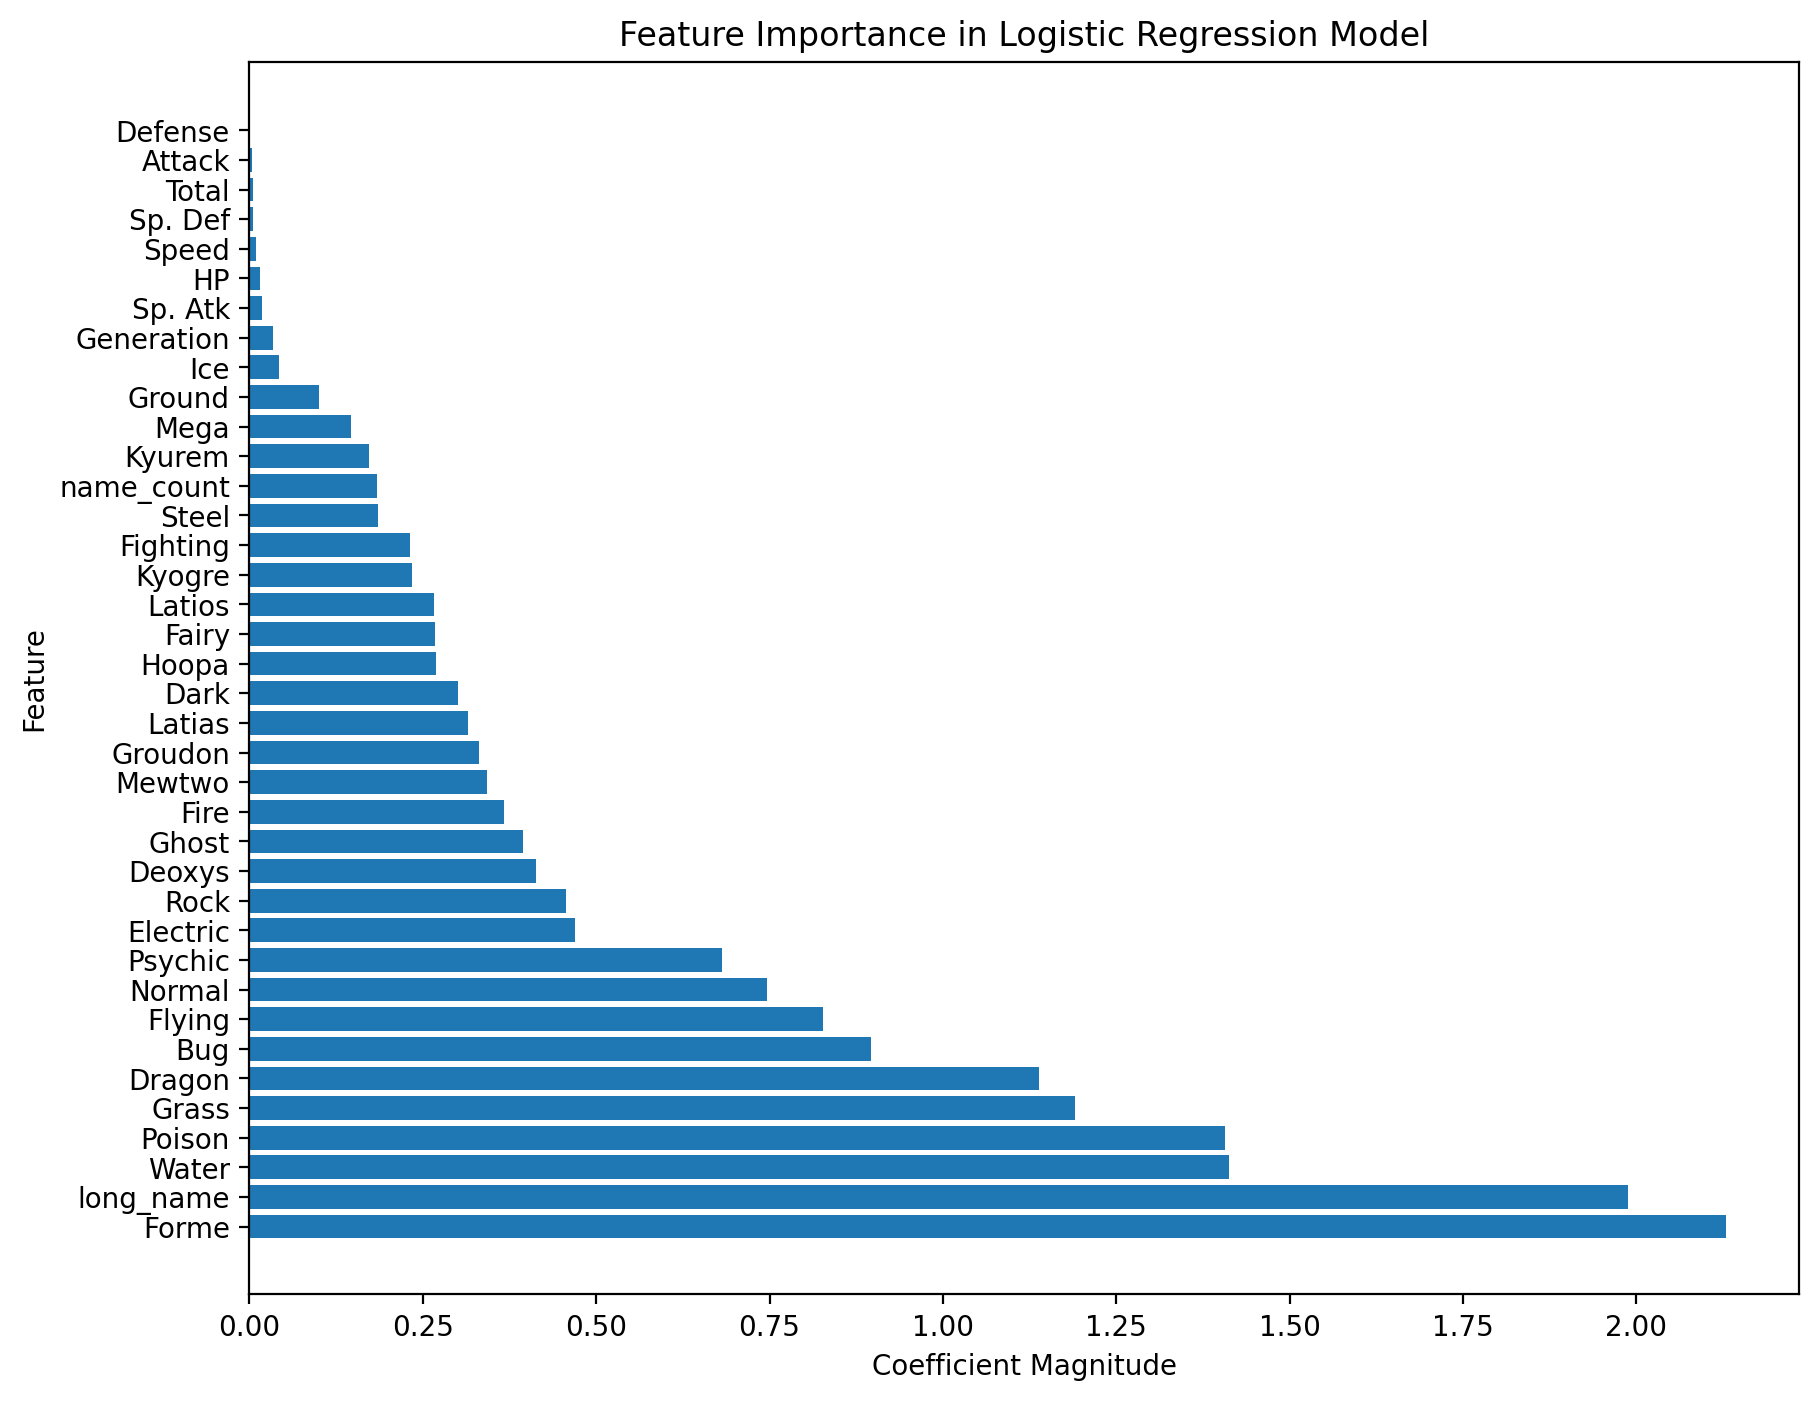

In [24]:
# 특성과 계수를 묶은 DataFrame 생성
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': np.abs(model.coef_[0])})

# 계수의 크기를 기준으로 내림차순 정렬
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# 막대그래프로 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

## Support Vector Machines, SVM
데이터를 클래스로 나누는 최적의 초평면을 찾는 모델  
주어진 데이터에 대해 최대 마진을 갖는 결정 초평면을 찾아 분류한다.

In [25]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### confusion matrix

In [26]:
confusion_matrix(y_test, y_pred)

array([[145,   2],
       [  6,   7]])

- 실제 Positive인 케이스(참 양성, True Positive): 145건
- 실제 Negative인 케이스(참 음성, True Negative): 2건
- False Negative: 6건
- False Positive: 7건

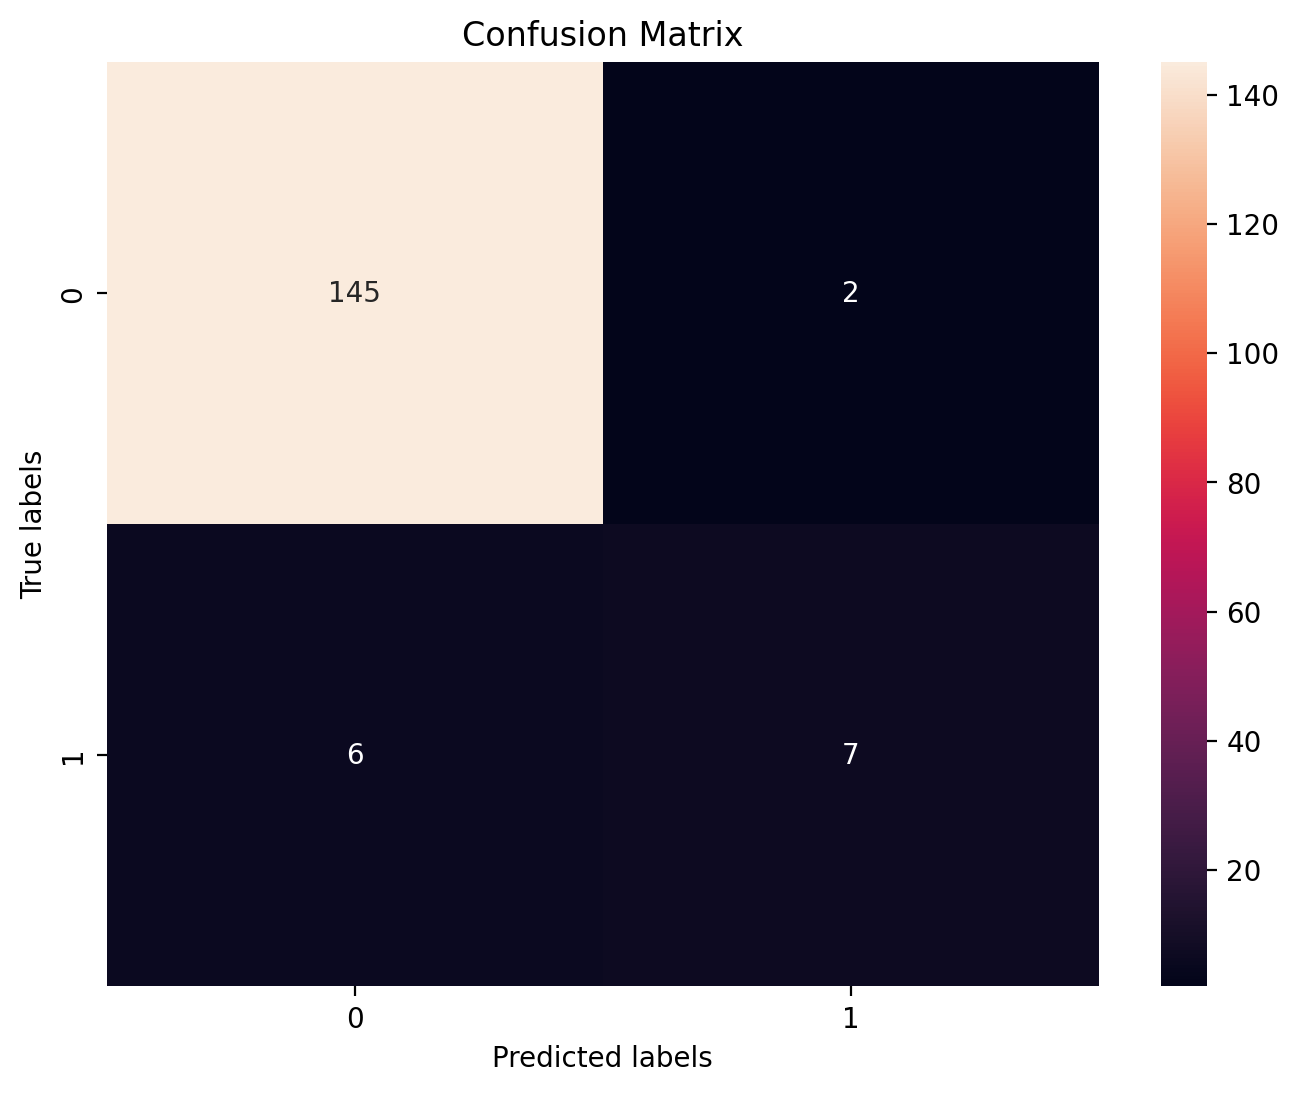

In [27]:
cm = confusion_matrix(y_test, y_pred)

# 숫자 출력 형식을 변경하는 Matplotlib 설정
plt.rcParams['axes.formatter.useoffset'] = False

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### classification report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       147
        True       0.78      0.54      0.64        13

    accuracy                           0.95       160
   macro avg       0.87      0.76      0.80       160
weighted avg       0.95      0.95      0.95       160



- False 클래스에 대한 평가 지표:
  - 정밀도(Precision): 0.96 (거짓으로 예측한 것 중에서 실제로 거짓인 비율)
  - 재현율(Recall): 0.99 (실제로 거짓인 것 중에서 모델이 올바르게 감지한 비율)
  - F1 점수(F1-score): 0.97 (정밀도와 재현율의 조화 평균)
  - Support(지원): 147 (거짓 클래스에 속한 샘플의 개수)

- True 클래스에 대한 평가 지표:
  - 정밀도(Precision): 0.78 (참으로 예측한 것 중에서 실제로 참인 비율)
  - 재현율(Recall): 0.54 (실제로 참인 것 중에서 모델이 올바르게 감지한 비율)
  - F1 점수(F1-score): 0.64 (정밀도와 재현율의 조화 평균)
  - Support(지원): 13 (참 클래스에 속한 샘플의 개수)

- 전체 데이터에 대한 평가 지표:
  - 정확도(Accuracy): 0.95 (전체 샘플 중 올바르게 분류된 샘플의 비율)
  - Weighted avg: 0.95 (가중 평균을 사용한 평균)
  - Macro avg: 0.80 (단순 평균을 사용한 평균)

### visualization
주어진 데이터를 고차원의 공간으로 매핑하여 클래스 간의 최적의 결정 경계를 찾는다.   
하지만 이러한 고차원 공간에서의 시각화는 어렵기 때문에 특성이 2개인 경우, 그래프로 시각화할 수 있다.  

용량 때문에 주석 처리하고 올립니다.  

In [29]:
# # 훈련 데이터에서 두 개의 주요 특성 선택
# X_train_subset = X_train[features[:2]]

# # 모델 훈련
# model.fit(X_train_subset, y_train)

# # 결정 경계를 시각화할 그리드 생성
# x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
# y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                      np.arange(y_min, y_max, 0.1))#

# # 결정 경계 시각화
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.4)
# plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, s=20, edgecolor='k')
# plt.xlabel(features[0])
# plt.ylabel(features[1])
# plt.title('Support Vector Machine Decision Boundary Visualization')
# plt.show()

## XGBoost
트리 기반의 앙상블 학습 알고리즘 중 하나  
Gradient Boosting Machine(GBM)의 확장된 버전으로, 뛰어난 예측 성능과 계산 효율성으로 널리 사용된다.   
XGBoost는 대용량 데이터셋에서도 뛰어난 성능을 보이며, 다양한 분야에서 사용된다.

In [30]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### confusion matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  0,  13]])

- 실제 Positive인 케이스(참 양성, True Positive): 144건
- 실제 Negative인 케이스(참 음성, True Negative): 3건
- False Negative: 0건
- False Positive: 13건

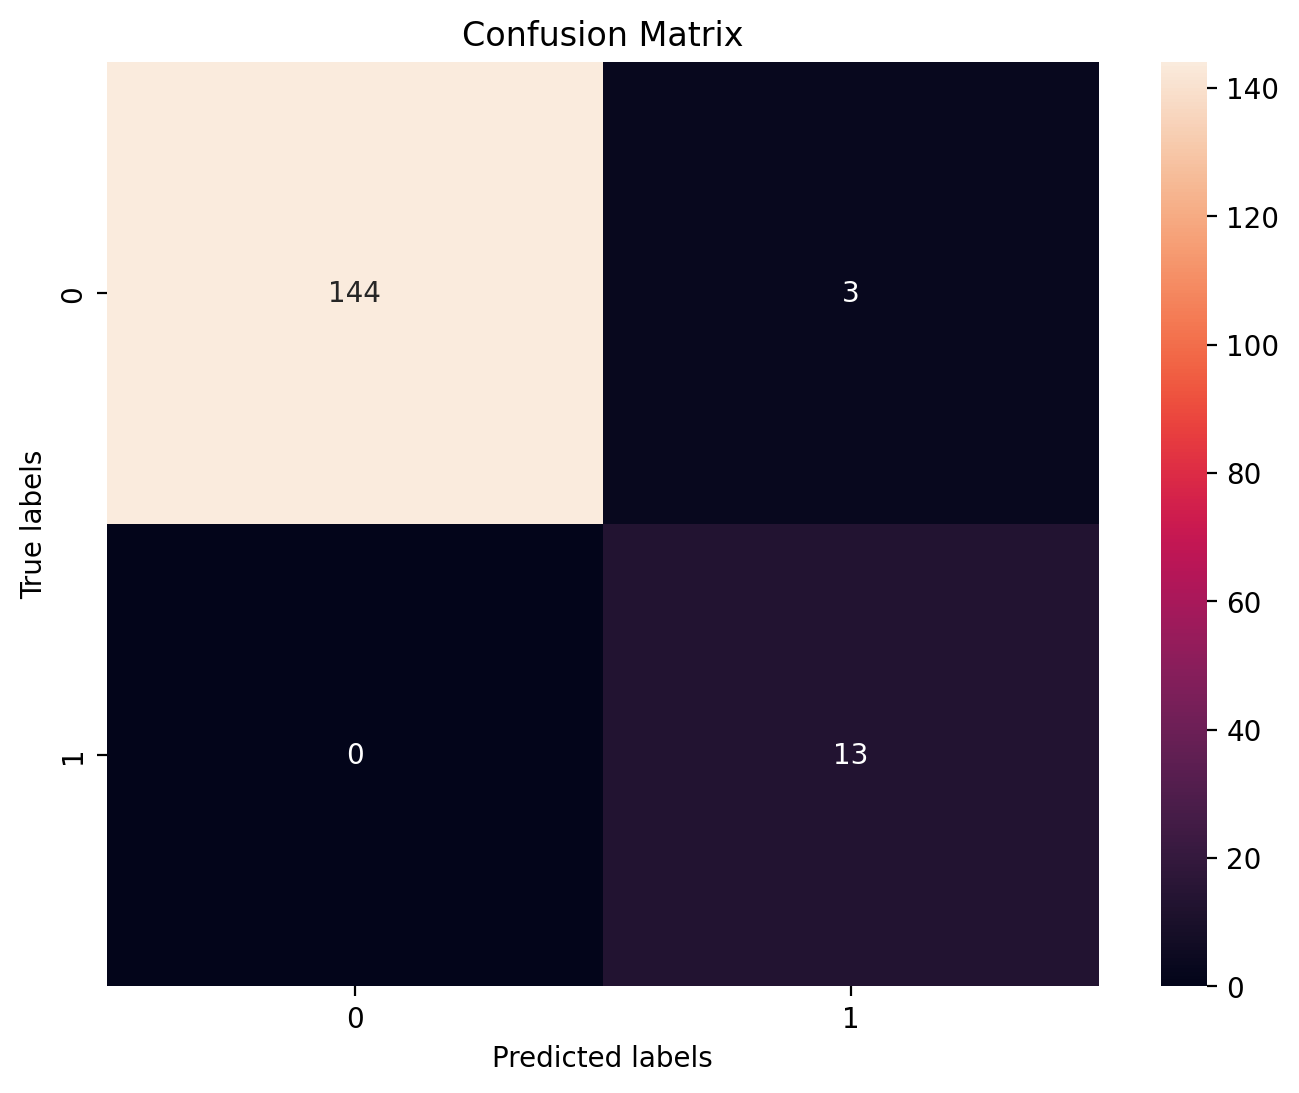

In [32]:
cm = confusion_matrix(y_test, y_pred)

# 숫자 출력 형식을 변경하는 Matplotlib 설정
plt.rcParams['axes.formatter.useoffset'] = False

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### classification report

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       147
        True       0.81      1.00      0.90        13

    accuracy                           0.98       160
   macro avg       0.91      0.99      0.94       160
weighted avg       0.98      0.98      0.98       160



- False 클래스에 대한 평가 지표:
  - 정밀도(Precision): 1.00 (거짓으로 예측한 것 중에서 실제로 거짓인 비율)
  - 재현율(Recall): 0.98 (실제로 거짓인 것 중에서 모델이 올바르게 감지한 비율)
  - F1 점수(F1-score): 0.99 (정밀도와 재현율의 조화 평균)
  - Support(지원): 147 (거짓 클래스에 속한 샘플의 개수)

- True 클래스에 대한 평가 지표:
  - 정밀도(Precision): 0.81 (참으로 예측한 것 중에서 실제로 참인 비율)
  - 재현율(Recall): 1.00 (실제로 참인 것 중에서 모델이 올바르게 감지한 비율)
  - F1 점수(F1-score): 0.90 (정밀도와 재현율의 조화 평균)
  - Support(지원): 13 (참 클래스에 속한 샘플의 개수)

- 전체 데이터에 대한 평가 지표:
  - 정확도(Accuracy): 0.98 (전체 샘플 중 올바르게 분류된 샘플의 비율)
  - Weighted avg: 0.98 (가중 평균을 사용한 평균)
  - Macro avg: 0.94 (단순 평균을 사용한 평균)

### visualization
모델의 특징 중요도를 확인

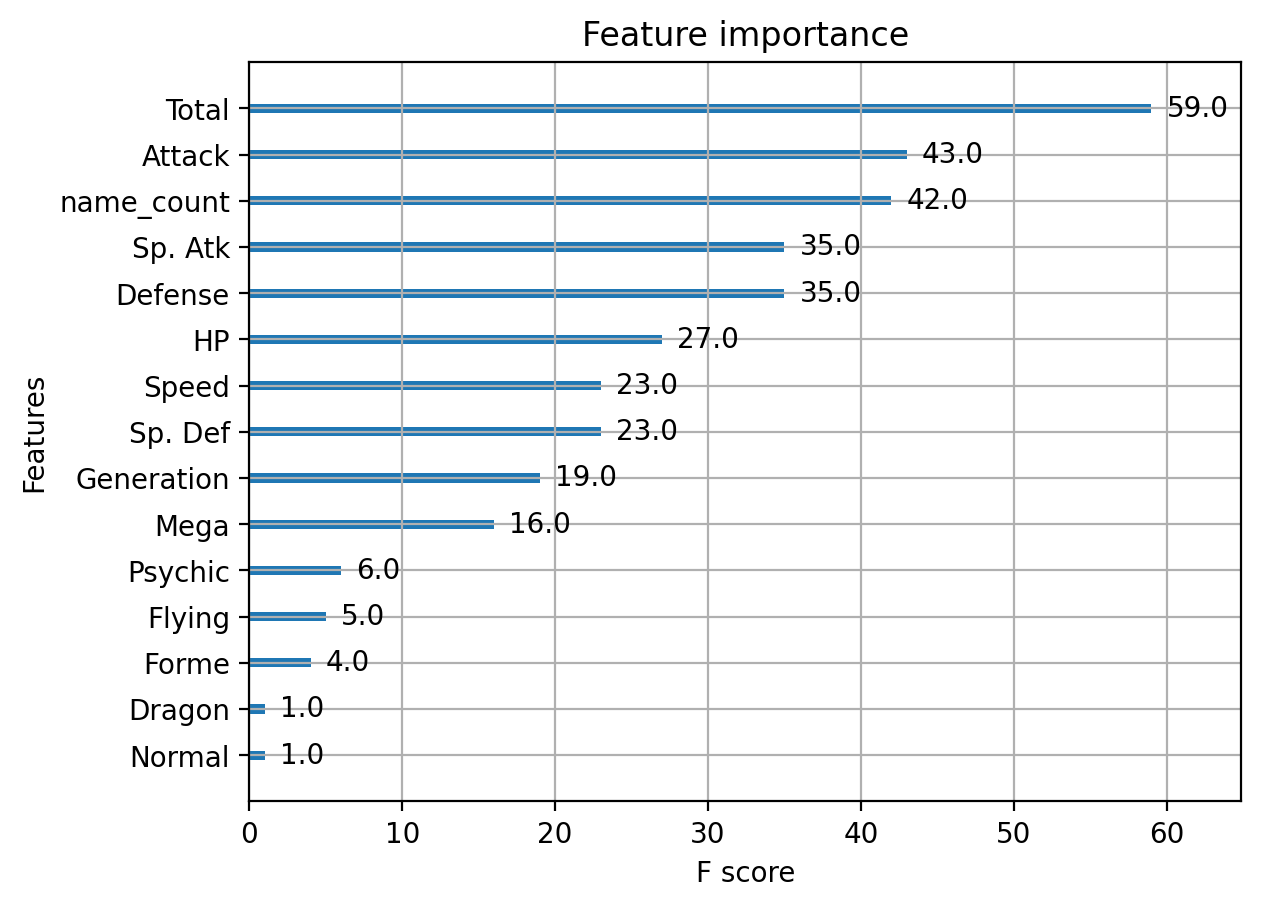

In [34]:
from xgboost import plot_importance

plot_importance(model)
plt.show()